In [1]:
from google.colab import drive

# Google Driveをマウント
drive.mount('/content/drive')

# マウント完了後のメッセージ
print("Google Driveがマウントされました！")

Mounted at /content/drive
Google Driveがマウントされました！


# 目的変数の分布確認

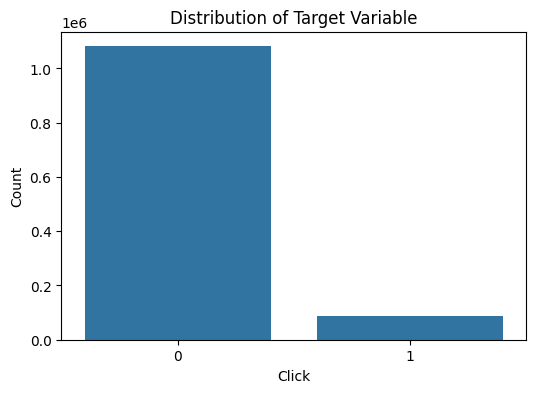

目的変数の割合:
click
0    0.924941
1    0.075059
Name: proportion, dtype: float64


,id,click,I1,I2,C1,C2,C3,C4,C5,C6,...,I13,I14,C2_freq,C3_freq,C5_freq,C2_freq_group,C3_freq_group,C5_freq_group,C2_I11_interaction,I5_I12_I6_sum
count,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,...,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06
mean,5.845205e+05,7.505889e-02,3.031627e+00,1.220570e+01,1.169567e+09,2.381345e+09,2.012817e+09,2.177769e+09,1.888389e+09,2.186933e+09,...,1.153490e+01,4.703069e+00,1.477869e-01,6.015494e-02,1.453105e-01,1.776802e+00,1.825009e+00,8.713596e-01,7.281466e+09,1.952110e+00
std,3.374735e+05,2.634865e-01,1.992983e+00,6.139743e+00,1.087105e+09,1.099911e+09,1.195821e+09,4.357866e+08,9.501573e+08,9.617819e+08,...,2.680560e+00,2.133585e+00,9.745590e-02,5.016411e-02,1.486228e-01,1.367942e+00,1.419665e+00,7.361078e-01,5.512363e+09,1.230729e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.212560e+08,5.393295e+07,2.200363e+07,4.001228e+08,2.446028e+07,1.477335e+08,...,9.999995e-07,9.999995e-07,8.554013e-07,8.554013e-07,8.554013e-07,0.000000e+00,0.000000e+00,0.000000e+00,5.393292e+01,1.999999e-06
25%,2.922602e+05,0.000000e+00,1.000000e+00,7.000000e+00,4.212560e+08,1.537671e+09,1.025908e+09,2.298911e+09,1.410458e+09,1.509931e+09,...,1.052460e+01,3.688879e+00,8.316553e-02,1.425355e-02,6.177708e-03,0.000000e+00,0.000000e+00,0.000000e+00,3.336323e+09,1.098613e+00
50%,5.845205e+05,0.000000e+00,3.000000e+00,1.300000e+01,4.212560e+08,1.862037e+09,1.998340e+09,2.411206e+09,2.321673e+09,1.769723e+09,...,1.186084e+01,5.564520e+00,1.230058e-01,4.875787e-02,9.481524e-02,2.000000e+00,2.000000e+00,1.000000e+00,5.962969e+09,1.609439e+00
75%,8.767808e+05,0.000000e+00,5.000000e+00,1.700000e+01,2.581703e+09,3.874379e+09,2.903162e+09,2.411206e+09,2.321673e+09,3.111152e+09,...,1.344851e+01,5.968708e+00,2.576794e-01,1.336077e-01,3.435214e-01,3.000000e+00,3.000000e+00,1.000000e+00,1.042439e+10,2.564950e+00
max,1.169041e+06,1.000000e+00,6.000000e+00,2.300000e+01,3.651044e+09,4.218832e+09,4.231334e+09,3.954818e+09,4.272797e+09,4.161523e+09,...,1.671104e+01,9.472782e+00,2.576794e-01,1.363843e-01,3.435214e-01,4.000000e+00,4.000000e+00,2.000000e+00,4.226630e+10,1.206938e+01


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# TSVファイルを読み込む
file_path = '/content/drive/My Drive/ad_click_prediction/data/train_0101.tsv'
train = pd.read_csv(file_path, low_memory= False,  sep='\t')

# 新しい特徴量を作成
train['C2_I11_interaction'] = train['C2'] * train['I11']
train['I5_I12_I6_sum'] = train['I5'] + train['I12'] + train['I6']

# 目的変数の分布
plt.figure(figsize=(6, 4))
sns.countplot(x='click', data=train)
plt.title('Distribution of Target Variable')
plt.xlabel('Click')
plt.ylabel('Count')
plt.show()

# 比率も確認
print("目的変数の割合:")
print(train['click'].value_counts(normalize=True))

train.describe()



In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169042 entries, 0 to 1169041
Data columns (total 30 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1169042 non-null  int64  
 1   click               1169042 non-null  int64  
 2   I1                  1169042 non-null  int64  
 3   I2                  1169042 non-null  int64  
 4   C1                  1169042 non-null  int64  
 5   C2                  1169042 non-null  int64  
 6   C3                  1169042 non-null  int64  
 7   C4                  1169042 non-null  int64  
 8   C5                  1169042 non-null  int64  
 9   C6                  1169042 non-null  int64  
 10  I3                  1169042 non-null  int64  
 11  I4                  1169042 non-null  int64  
 12  I5                  1169042 non-null  float64
 13  I6                  1169042 non-null  int64  
 14  I7                  1169042 non-null  int64  
 15  I8             

Statistics for I1:
count    1.169042e+06
mean     3.031627e+00
std      1.992983e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: I1, dtype: float64



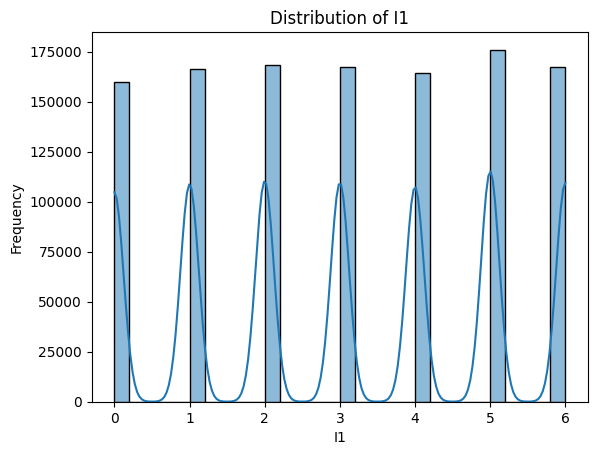

Statistics for I2:
count    1.169042e+06
mean     1.220570e+01
std      6.139743e+00
min      0.000000e+00
25%      7.000000e+00
50%      1.300000e+01
75%      1.700000e+01
max      2.300000e+01
Name: I2, dtype: float64



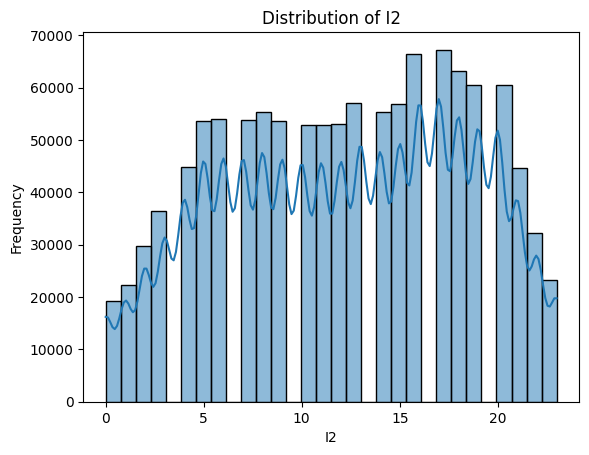

Statistics for I3:
count    1.169042e+06
mean     1.256480e+00
std      6.717402e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.000000e+00
Name: I3, dtype: float64



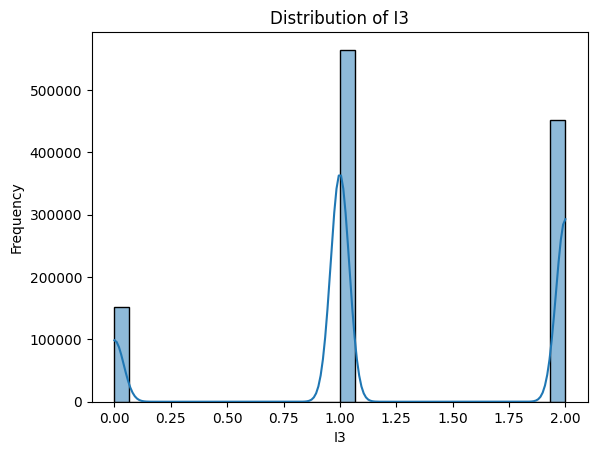

Statistics for I4:
count    1.169042e+06
mean     4.682569e-01
std      7.035656e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      2.000000e+00
Name: I4, dtype: float64



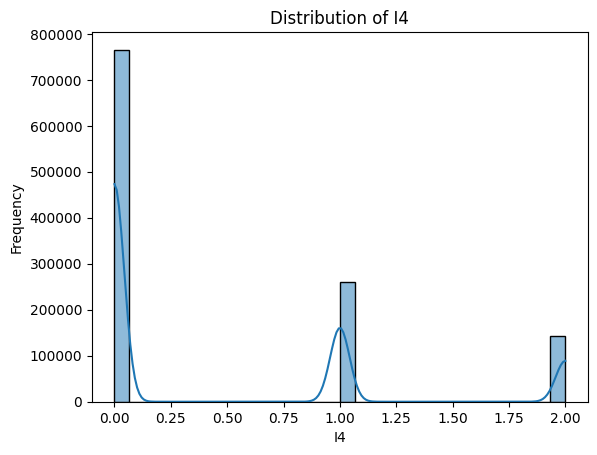

Statistics for I5:
count    1.169042e+06
mean     8.661839e-02
std      3.530737e-01
min      9.999995e-07
25%      9.999995e-07
50%      9.999995e-07
75%      9.999995e-07
max      7.583756e+00
Name: I5, dtype: float64



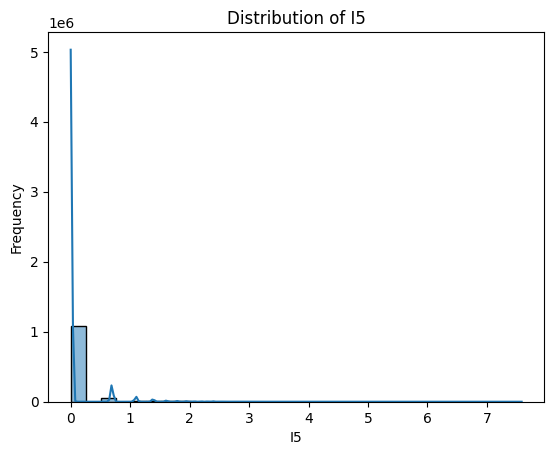

Statistics for I6:
count    1.169042e+06
mean     1.047524e-01
std      3.062343e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: I6, dtype: float64



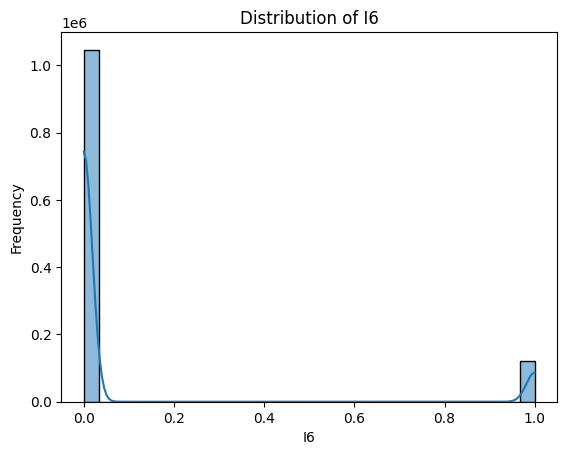

Statistics for I7:
count    1.169042e+06
mean     5.746586e-02
std      2.327307e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: I7, dtype: float64



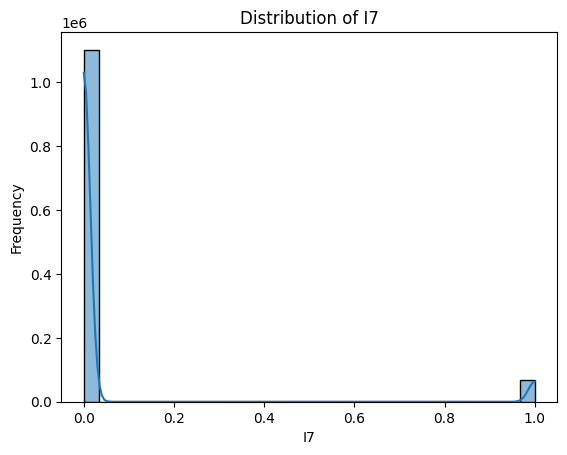

Statistics for I8:
count    1.169042e+06
mean     8.747077e-02
std      2.825238e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: I8, dtype: float64



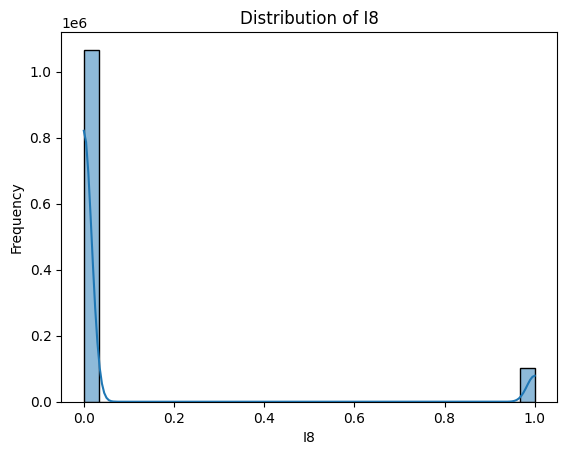

Statistics for I9:
count    1.169042e+06
mean     3.626439e-01
std      4.807635e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: I9, dtype: float64



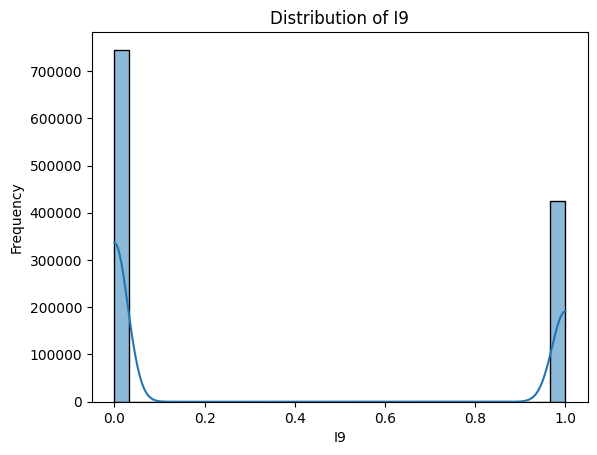

Statistics for I10:
count    1.169042e+06
mean     3.801831e-01
std      4.854319e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: I10, dtype: float64



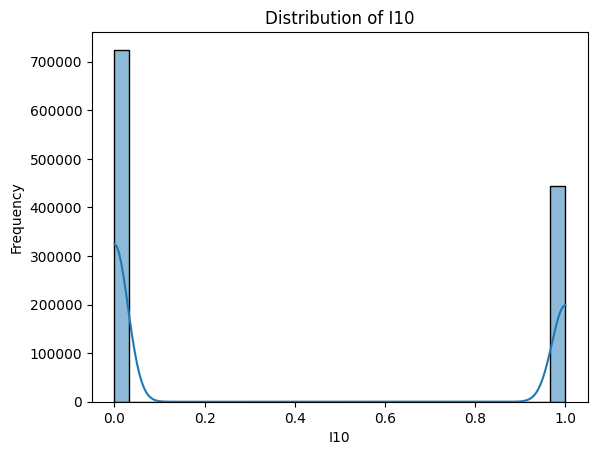

Statistics for I11:
count    1.169042e+06
mean     3.141446e+00
std      1.911490e+00
min      9.999995e-07
25%      1.945910e+00
50%      2.995732e+00
75%      4.127134e+00
max      1.097994e+01
Name: I11, dtype: float64



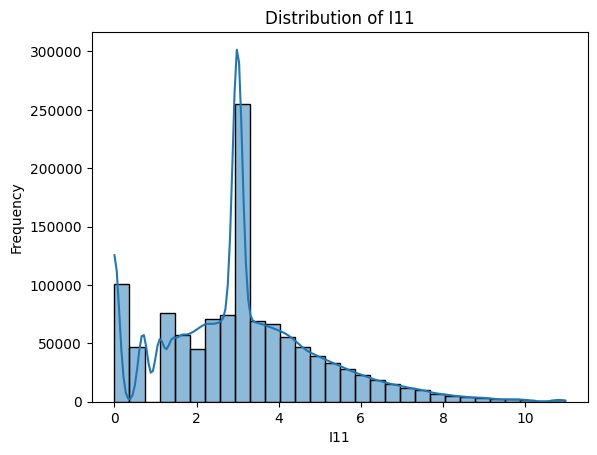

Statistics for I12:
count    1.169042e+06
mean     1.760739e+00
std      1.004718e+00
min      9.999995e-07
25%      1.098612e+00
50%      1.609438e+00
75%      2.302585e+00
max      1.039406e+01
Name: I12, dtype: float64



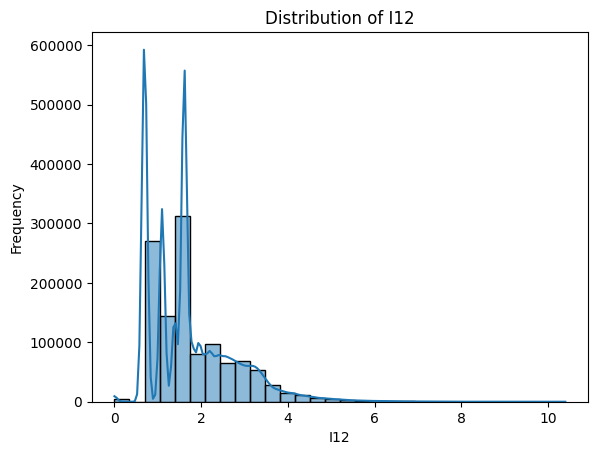

Statistics for I13:
count    1.169042e+06
mean     1.153490e+01
std      2.680560e+00
min      9.999995e-07
25%      1.052460e+01
50%      1.186084e+01
75%      1.344851e+01
max      1.671104e+01
Name: I13, dtype: float64



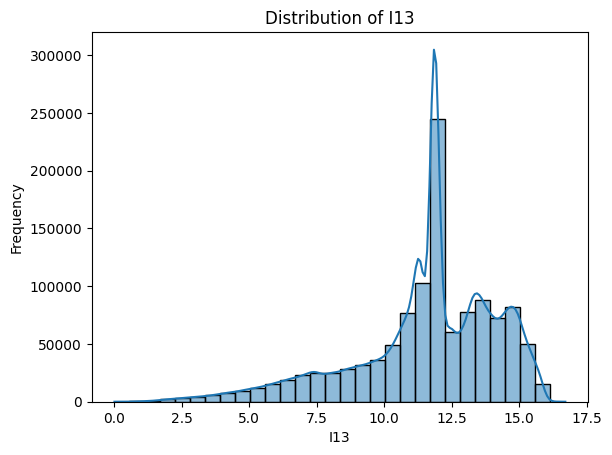

Statistics for I14:
count    1.169042e+06
mean     4.703069e+00
std      2.133585e+00
min      9.999995e-07
25%      3.688879e+00
50%      5.564520e+00
75%      5.968708e+00
max      9.472782e+00
Name: I14, dtype: float64



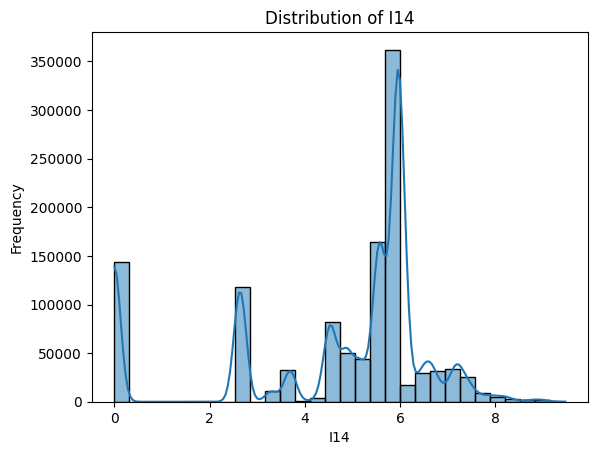

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# TSVファイルを読み込む
file_path = '/content/drive/My Drive/ad_click_prediction/data/train_0101.tsv'
train = pd.read_csv(file_path, low_memory= False,  sep='\t')

# 数値特徴量のリスト（I1～I14を想定）
numeric_columns = [col for col in train.columns if col.startswith('I')]

for col in numeric_columns:
    # 統計情報を表示
    print(f"Statistics for {col}:\n{train[col].describe()}\n")

    # ヒストグラムを描画
    sns.histplot(train[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Statistics for C1:
count    1.169042e+06
mean     1.169567e+09
std      1.087105e+09
min      4.212560e+08
25%      4.212560e+08
50%      4.212560e+08
75%      2.581703e+09
max      3.651044e+09
Name: C1, dtype: float64



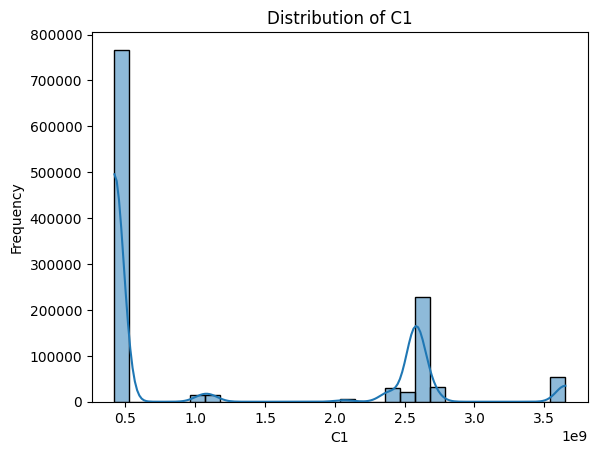

Statistics for C2:
count    1.169042e+06
mean     2.381345e+09
std      1.099911e+09
min      5.393295e+07
25%      1.537671e+09
50%      1.862037e+09
75%      3.874379e+09
max      4.218832e+09
Name: C2, dtype: float64



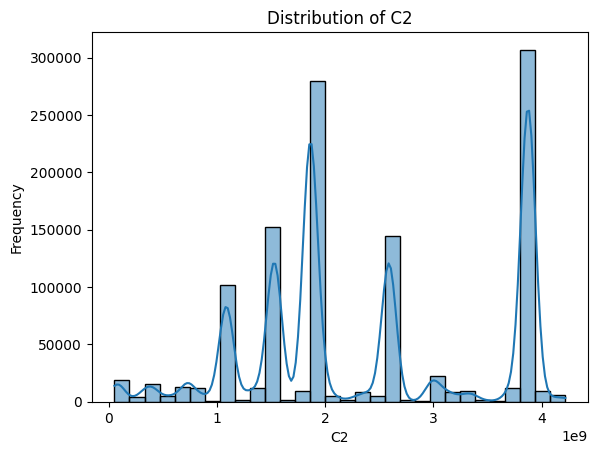

Statistics for C3:
count    1.169042e+06
mean     2.012817e+09
std      1.195821e+09
min      2.200363e+07
25%      1.025908e+09
50%      1.998340e+09
75%      2.903162e+09
max      4.231334e+09
Name: C3, dtype: float64



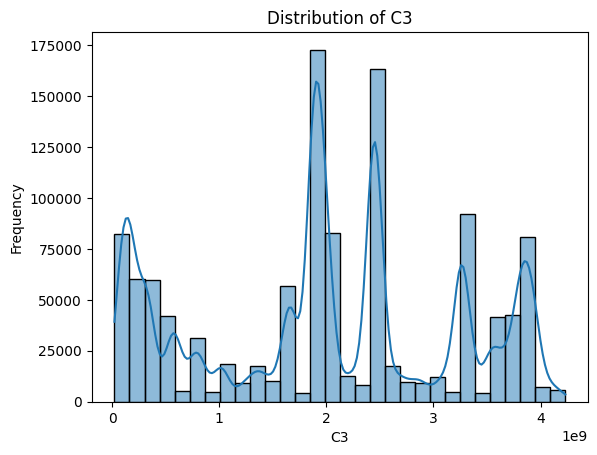

Statistics for C4:
count    1.169042e+06
mean     2.177769e+09
std      4.357866e+08
min      4.001228e+08
25%      2.298911e+09
50%      2.411206e+09
75%      2.411206e+09
max      3.954818e+09
Name: C4, dtype: float64



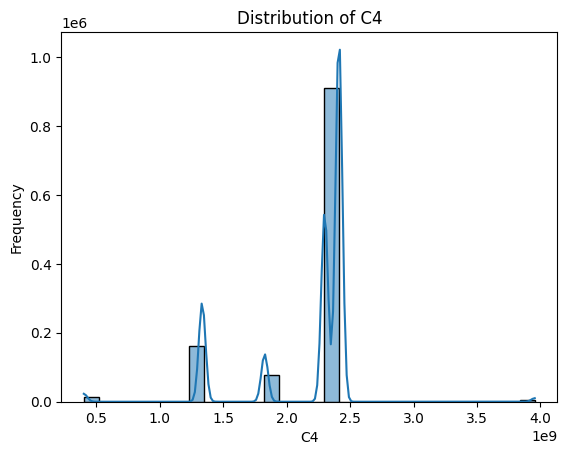

Statistics for C5:
count    1.169042e+06
mean     1.888389e+09
std      9.501573e+08
min      2.446028e+07
25%      1.410458e+09
50%      2.321673e+09
75%      2.321673e+09
max      4.272797e+09
Name: C5, dtype: float64



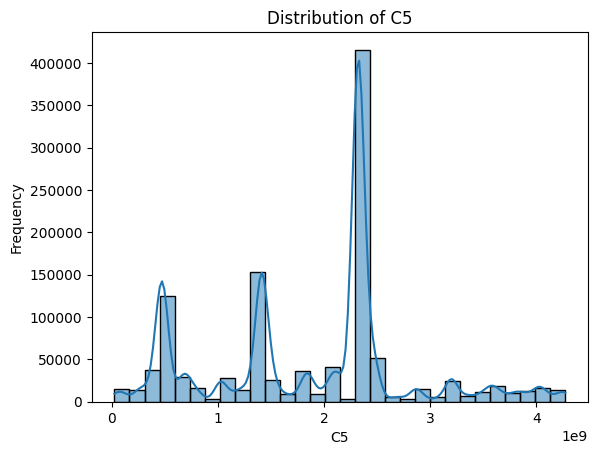

Statistics for C6:
count    1.169042e+06
mean     2.186933e+09
std      9.617819e+08
min      1.477335e+08
25%      1.509931e+09
50%      1.769723e+09
75%      3.111152e+09
max      4.161523e+09
Name: C6, dtype: float64



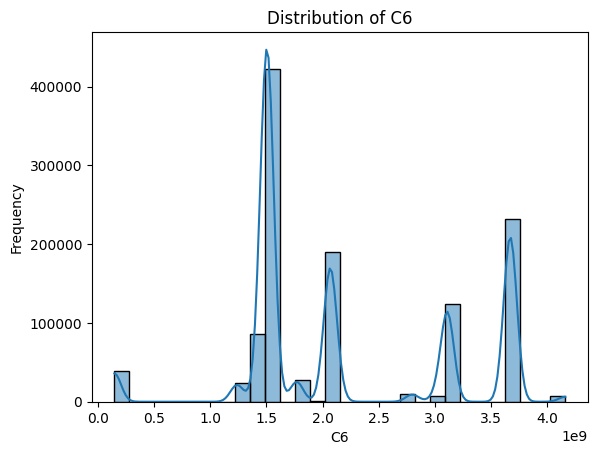

Statistics for C2_freq:
count    1.169042e+06
mean     1.477869e-01
std      9.745590e-02
min      8.554013e-07
25%      8.316553e-02
50%      1.230058e-01
75%      2.576794e-01
max      2.576794e-01
Name: C2_freq, dtype: float64



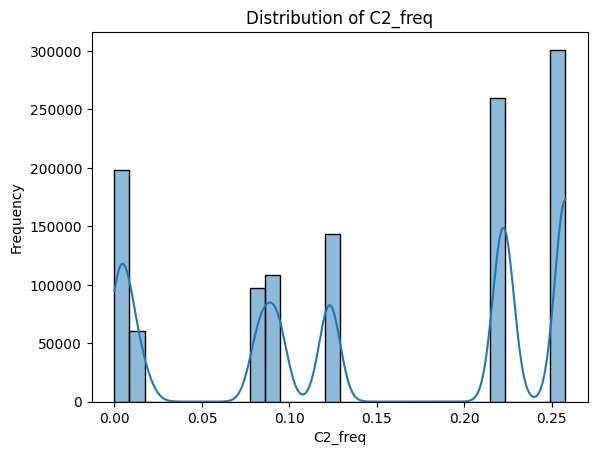

Statistics for C3_freq:
count    1.169042e+06
mean     6.015494e-02
std      5.016411e-02
min      8.554013e-07
25%      1.425355e-02
50%      4.875787e-02
75%      1.336077e-01
max      1.363843e-01
Name: C3_freq, dtype: float64



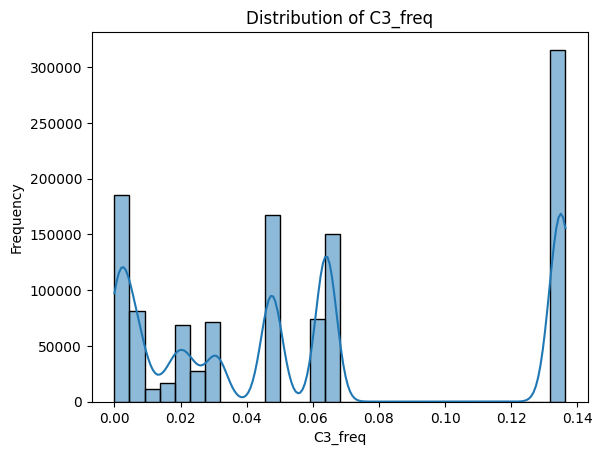

Statistics for C5_freq:
count    1.169042e+06
mean     1.453105e-01
std      1.486228e-01
min      8.554013e-07
25%      6.177708e-03
50%      9.481524e-02
75%      3.435214e-01
max      3.435214e-01
Name: C5_freq, dtype: float64



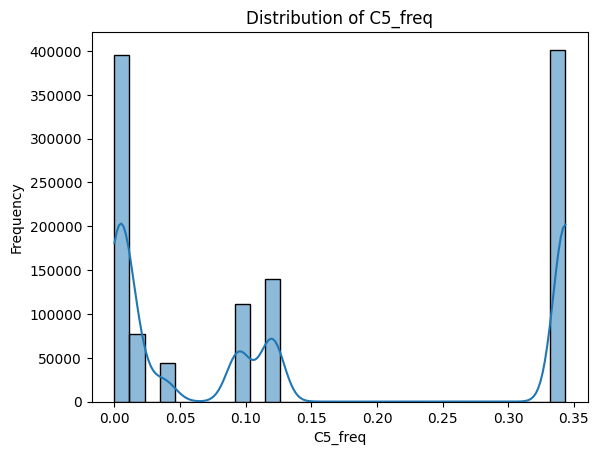

Statistics for C2_freq_group:
count    1.169042e+06
mean     1.776802e+00
std      1.367942e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      4.000000e+00
Name: C2_freq_group, dtype: float64



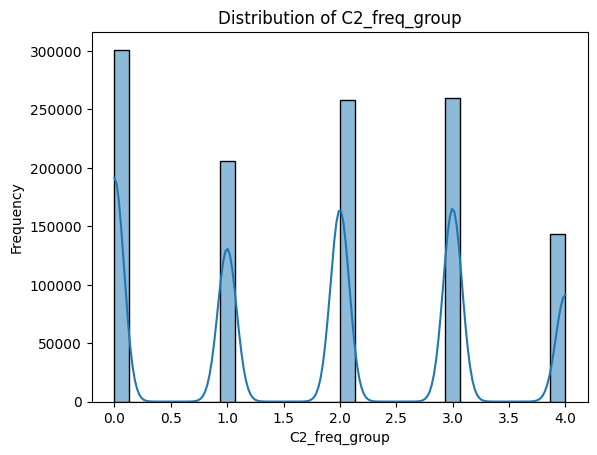

Statistics for C3_freq_group:
count    1.169042e+06
mean     1.825009e+00
std      1.419665e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      4.000000e+00
Name: C3_freq_group, dtype: float64



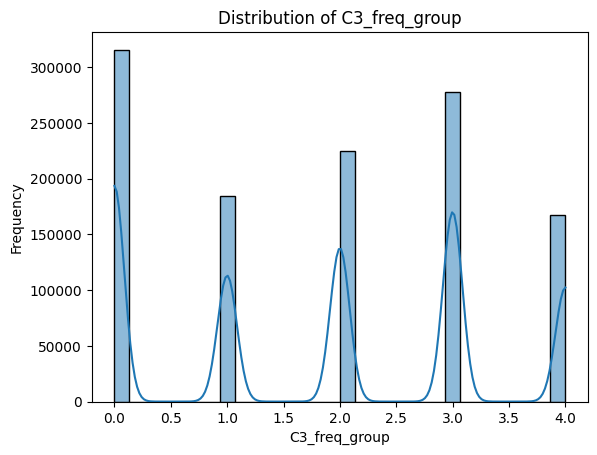

Statistics for C5_freq_group:
count    1.169042e+06
mean     8.713596e-01
std      7.361078e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.000000e+00
Name: C5_freq_group, dtype: float64



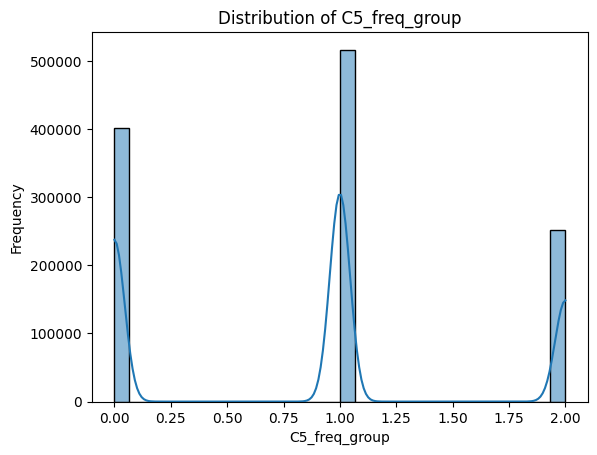

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# TSVファイルを読み込む
file_path = '/content/drive/My Drive/ad_click_prediction/data/train_0101.tsv'
train = pd.read_csv(file_path, low_memory= False,  sep='\t')

# 数値特徴量のリスト（I1～I14を想定）
numeric_columns = [col for col in train.columns if col.startswith('C')]

for col in numeric_columns:
    # 統計情報を表示
    print(f"Statistics for {col}:\n{train[col].describe()}\n")

    # ヒストグラムを描画
    sns.histplot(train[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# 数値型として扱うかカテゴリ型にするかの判断
数値型の判断:
値の大小がクリック率と連続的に関係していたので、そのまま数値型として扱いました。
カテゴリ型の判断:
クリック率に明確な差が見られたので、カテゴリ型に変換にしました。

# 箱ひげ図でカテゴリごとのデータ分布の違いを比較する

# 特徴量ごとの目的変数の分布を確認する

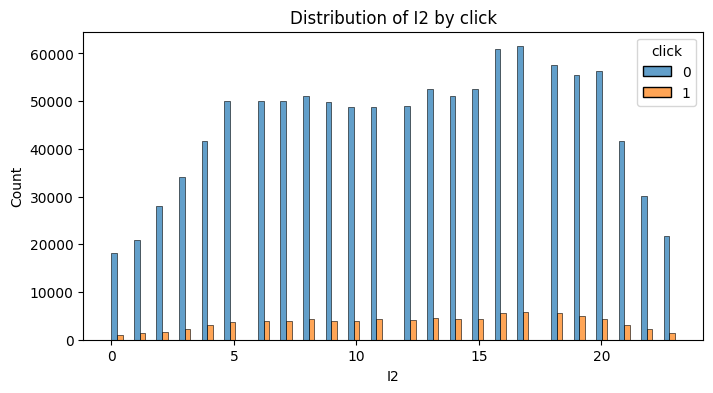

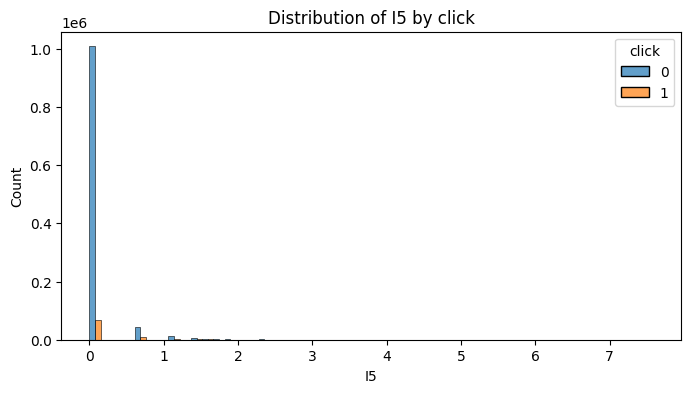

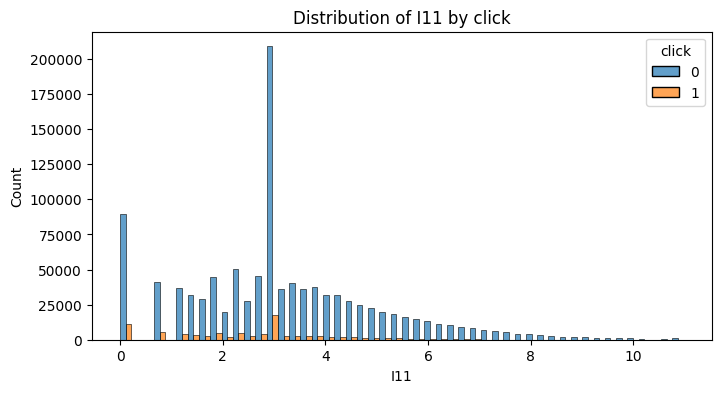

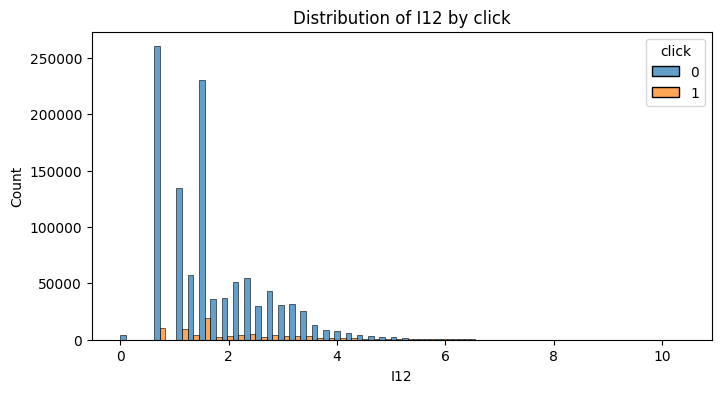

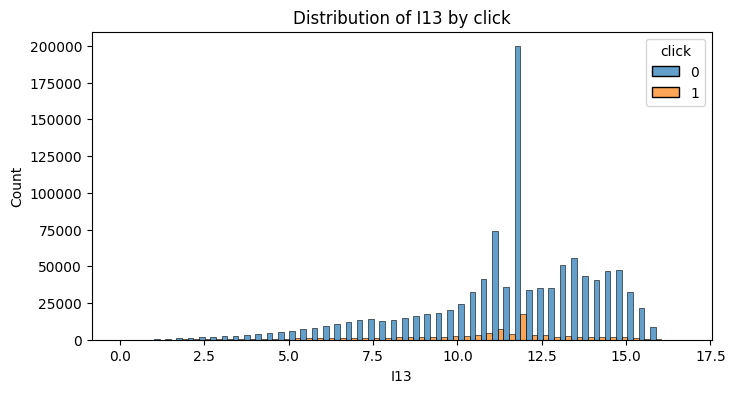

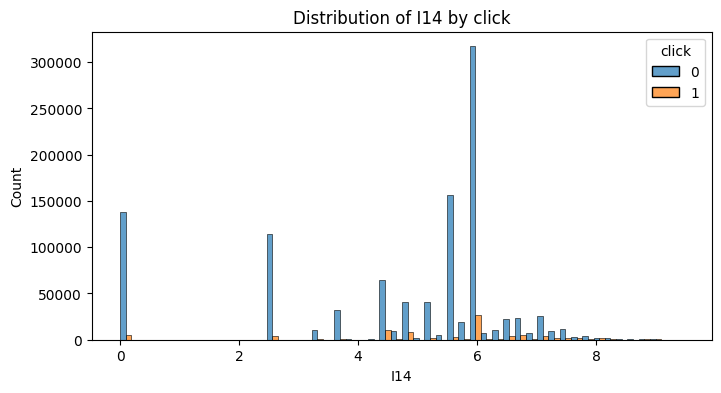

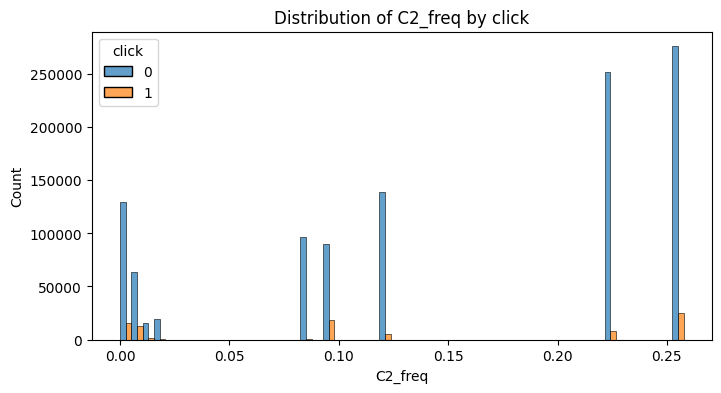

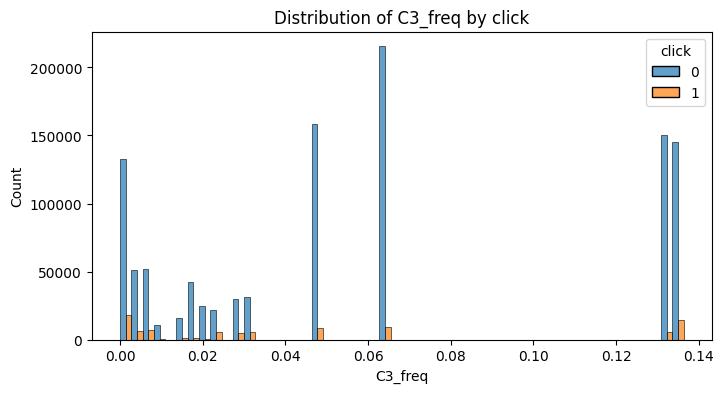

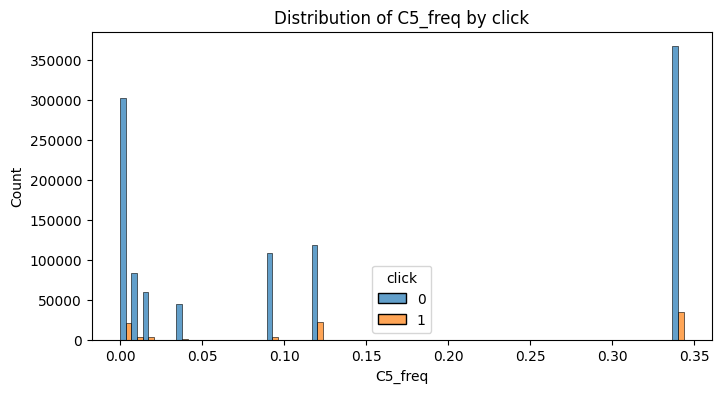

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 数値特徴量の分布を確認
numeric_cols = ['I2', 'I5', 'I11', 'I12', 'I13', 'I14',
                'C2_freq', 'C3_freq', 'C5_freq']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=train, x=col, hue='click', kde=False, bins=50, multiple='dodge', alpha=0.7)
    plt.title(f'Distribution of {col} by click')
    plt.show()



# 相関行列とヒートマップを確認する

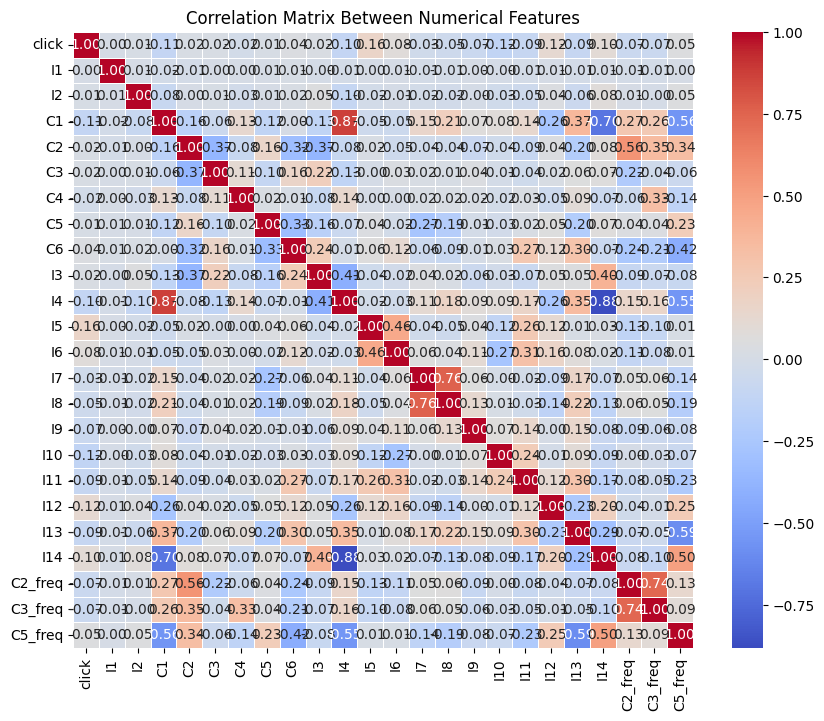

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# TSVファイルを読み込む
file_path = '/content/drive/My Drive/ad_click_prediction/data/train_0101.tsv'
train = pd.read_csv(file_path, low_memory= False,  sep='\t')

# 数値特徴量のリスト
numerical_features = ['click', 'I1', 'I2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'I3', 'I4', 'I5', 'I6', 'I7',
                      'I8', 'I9', 'I10', 'I11', 'I12', 'I13', 'I14', 'C2_freq', 'C3_freq', 'C5_freq']

# 数値変数の相関行列
correlation_matrix = train[numerical_features].corr()

# 相関行列をヒートマップで可視化
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Between Numerical Features")
plt.show()



## shap値を計算する

In [11]:
!pip install shap


In [12]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 15.9 MB/s eta 0:00:00


In [13]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import pandas as pd
from lightgbm.callback import early_stopping, log_evaluation

# TSVファイルを読み込む
file_path = '/content/drive/My Drive/ad_click_prediction/data/train_0101.tsv'
train = pd.read_csv(file_path, low_memory= False,  sep='\t')

# 新しい特徴量を作成
train['C2_I11_interaction'] = train['C2'] * train['I11']
train['I5_I12_I6_sum'] = train['I5'] + train['I12'] + train['I6']


# 目的変数（ターゲット列）と特徴量を分ける
target_column = 'click'  # 目的変数の列名に合わせて変更
X = train.drop(columns=[target_column])  # 目的変数以外を特徴量に設定
y = train[target_column]  # 目的変数を設定

# カテゴリカル変数をリストアップ
categorical_features = [col for col in X.columns if col.startswith('C')]

for col in categorical_features:
    X[col] = X[col].astype('category')

# データの分割
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルのトレーニング
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# トレーニング時のコールバックを設定
callbacks = [
    early_stopping(stopping_rounds=50),  # 早期停止
    log_evaluation(10)                  # ログを10イテレーションごとに表示
]

# モデルのトレーニング
lgb_model.fit(
    X_train, y_train,
    categorical_feature=categorical_features,  # カテゴリカル変数を指定
    eval_set=[(X_val, y_val)],                 # 検証データを指定
    eval_metric='logloss',                    # 評価指標を指定
    callbacks=callbacks                        # コールバックを設定
)


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 70231, number of negative: 865002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8445
[LightGBM] [Info] Number of data points in the train set: 935233, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.075095 -> initscore=-2.510942
[LightGBM] [Info] Start training from score -2.510942
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.223872
[20]	valid_0's binary_logloss: 0.21537
[30]	valid_0's binary_logloss: 0.212194
[40]	valid_0's binary_logloss

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(random_state=42)

In [14]:
import shap

# SHAP値の計算
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_val)


/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


In [15]:
print(len(shap_values))  # shap_valuesの長さを確認
print(shap_values[0].shape)  # 各SHAP値配列の形状を確認


233809
(29,)


In [16]:
# SHAP値の形状を確認
print("SHAP values shape:", shap_values.shape)

# クラス1（クリックあり）のSHAP値を抽出
shap_values_class_1 = shap_values[:, 1] if shap_values.ndim == 3 else shap_values

# 確認
print("Shape of shap_values_class_1:", shap_values_class_1.shape)



SHAP values shape: (233809, 29)
Shape of shap_values_class_1: (233809, 29)


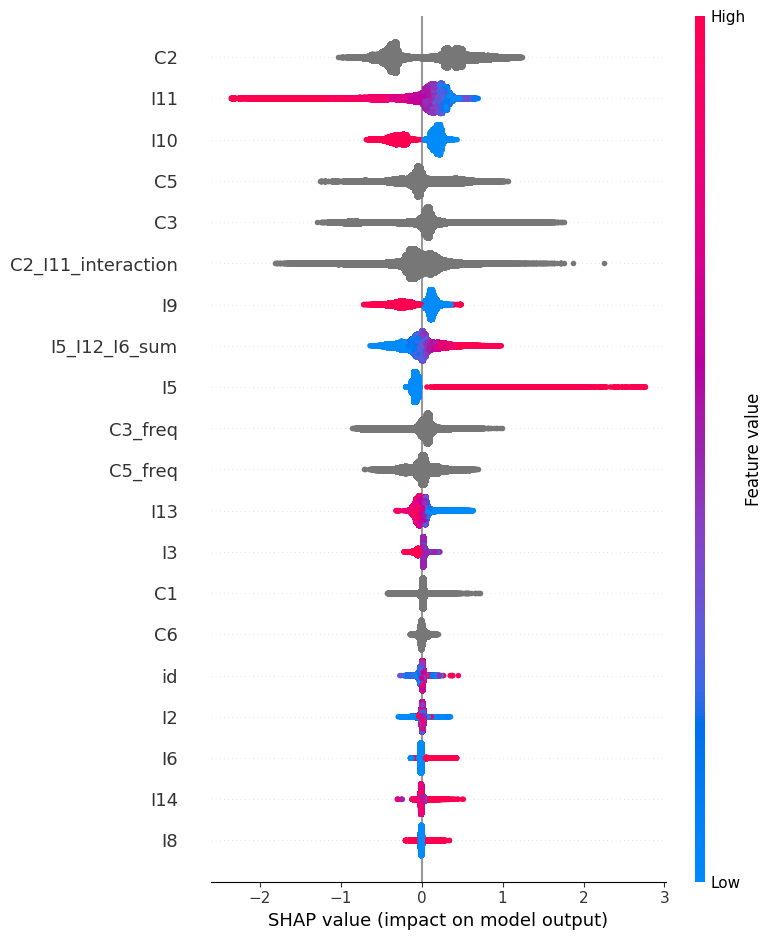

In [17]:
# summary_plotの実行
shap.summary_plot(shap_values, X_val)


# 目的変数を色分けして分布の詳細を確認する

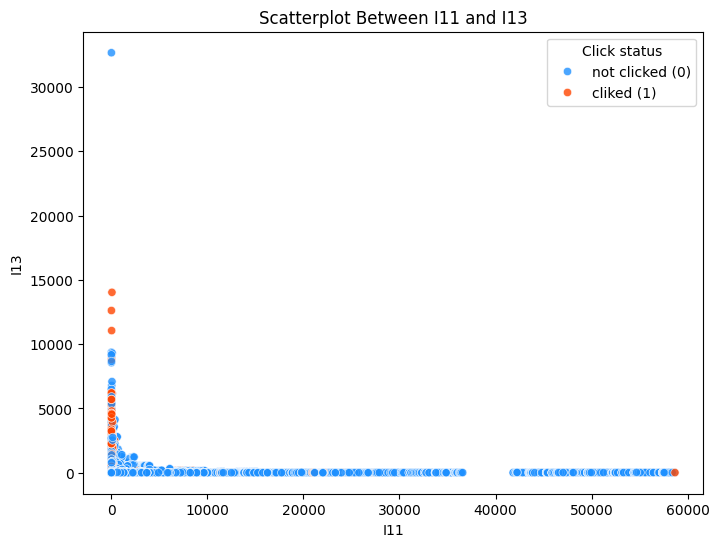

In [ ]:
# 数値変数同士の散布図 + 目的変数の色分け
plt.figure(figsize=(8, 6))

# 明示的に色を指定してプロット
sns.scatterplot(
    data=train,
    x='I11',
    y='I12',
    hue='click',
    palette={0: 'dodgerblue', 1: 'orangered'},  # クリックされた=青, クリックされない=赤
    alpha=0.8
)

# 凡例のタイトルとラベルをカスタマイズ
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["not clicked (0)", "cliked (1)"], title="Click status")

# タイトルと軸ラベル
plt.title("Scatterplot Between I11 and I13")
plt.xlabel("I11")
plt.ylabel("I13")

plt.show()
